## Developing A Model To Predict Housing Prices Using Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Importing our dataset

df = pd.read_csv("House_Sales_In_King_County_Cleaned1.csv") 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
y_data = df[['price']]
x_data = df[["sqft_living"]]

In [4]:
x_simplelinear_train, x_simplelinear_test, y_simplelinear_train, y_simplelinear_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

In [5]:
print("number of test samples :", x_simplelinear_test.shape[0])
print("number of training samples:",x_simplelinear_train.shape[0])

number of test samples : 4323
number of training samples: 17290


In [6]:
# We create a Linear Regression object
simple_lre=LinearRegression()

In [7]:
simple_lre.fit(x_simplelinear_train, y_simplelinear_train)

LinearRegression()

In [8]:
# Finding the values of the intercept and slope
print(simple_lre.intercept_)
print(simple_lre.coef_)

[-30186.36106106]
[[273.82181112]]


(0.0, 5845688.343417412)

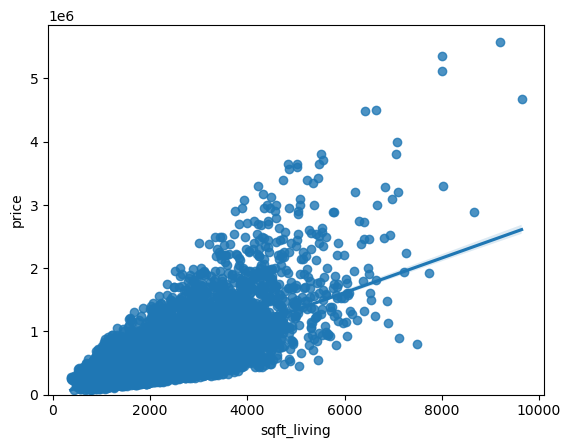

In [9]:
# Plotting the scatterplot of "sqft_living" and "price"
sns.regplot(x=x_simplelinear_train, y=y_simplelinear_train)
plt.ylim(0,)

In [10]:
# Predicting the first five values of price
Y_simplelinear_hat = simple_lre.predict(x_simplelinear_test)
Y_simplelinear_hat[0:5]

array([[733776.4919685 ],
       [416143.19106732],
       [618771.33129738],
       [591389.15018521],
       [361378.82884298]])

In [11]:
# Determing the R square value
simple_lre.score(x_simplelinear_test, y_simplelinear_test)

0.5033019006466926

In [12]:
# Determining the MSE
mean_squared_error(y_simplelinear_test, Y_simplelinear_hat)

85730574276.16481

## Developing A Model To Predict Housing Prices Using Multivariate Linear Regression

In [15]:
# Since some features are good predictors of price.
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [16]:
# Assigning our X and Y values
y_data = df[['price']]
x_data = df[features]

In [113]:
x_multilinear_train, x_multilinear_test, y_multilinear_train, y_multilinear_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

In [114]:
multi_lre=LinearRegression()
# Fitting our train dataset
multi_lre.fit(x_multilinear_train, y_multilinear_train)
Y_multilinear_hat = multi_lre.predict(x_multilinear_test)

In [72]:
# Making predictions for the five values
Y_multilinear_hat[0:5]

array([[652065.41118062],
       [512755.81831493],
       [809502.49924061],
       [706105.93687916],
       [219099.83981178]])

In [73]:
# Determining the R square value
multi_lre.score(x_multilinear_test, y_multilinear_test)

0.6459217069624446

In [74]:
# Determining the MSE
mean_squared_error(y_multilinear_test, Y_multilinear_hat)

61114257212.491714

## Developing A Model To Predict Housing Prices Using Multivariate Polynomial Regression

In [75]:
x_polylinear_train, x_polyilinear_test, y_polylinear_train, y_polylinear_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

Text(0.5, 1.0, 'R Square vs Order')

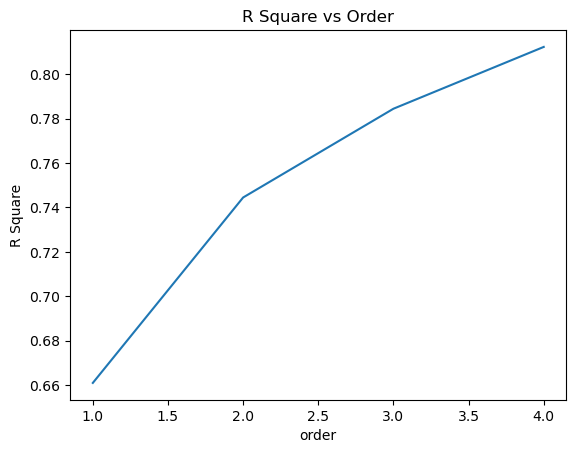

In [76]:
# Determining the best order from 1 to 4 by comparing their R square values
order = [1,2,3,4]
y_squ = []
for n in order:
    p_model = PolynomialFeatures(degree = n)
    p_x = p_model.fit_transform(x_polylinear_train)
    p_model.fit(p_x, y_polylinear_train)
    reg_model = LinearRegression()
    reg_model.fit(p_x, y_polylinear_train)
    Y_polylinear_hat = reg_model.predict(p_x)
    y_squ.append(reg_model.score(p_x, y_polylinear_train))
plt.plot(order, y_squ)
plt.xlabel('order')
plt.ylabel('R Square')
plt.title('R Square vs Order')
    
# From the figure below, we can tell the model performs best when order = 4 i.e, it has the highest R square value

Text(0.5, 1.0, 'MSE vs Order')

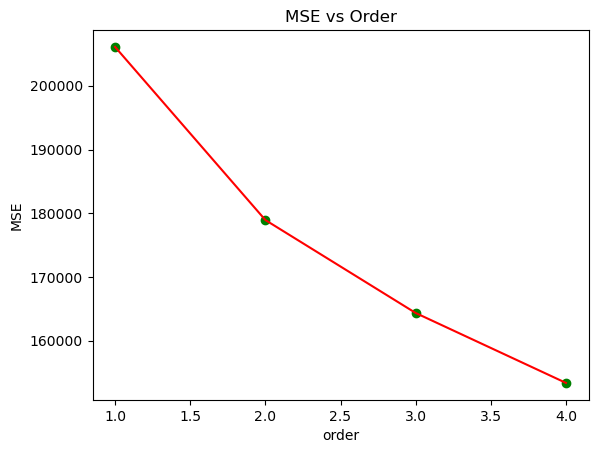

In [81]:
# Determining the best order from 1 to 4 by comparing their MSEs.
order = [1,2,3,4]
y_mse = []
for n in order:
    p_model = PolynomialFeatures(degree = n)
    p_x = p_model.fit_transform(x_polylinear_train)
    p_model.fit(p_x, y_polylinear_train)
    reg_model = LinearRegression()
    reg_model.fit(p_x, y_polylinear_train)
    Y_polylinear_hat = reg_model.predict(p_x)
    y_mse.append(mean_squared_error(y_polylinear_train, Y_polylinear_hat, squared = False))
plt.scatter(order, y_mse, color = "green")
plt.plot(order, y_mse, color = "red")
plt.xlabel('order')
plt.ylabel('MSE')
plt.title('MSE vs Order')
    
# From the figure below, we can tell the model performs best when order = 4 i.e, it has the lowest MSE

In [82]:
# Predicting our first five values
Y_polylinear_hat[0:5]

array([[575120.61492193],
       [718775.61492193],
       [439229.05242193],
       [944547.61492193],
       [344817.98992193]])

In [83]:
# Determining the R square value
r2_score(y_polylinear_train, Y_polylinear_hat)

0.8122242551986114

In [84]:
# Determining the MSE
mean_squared_error(y_polylinear_train, Y_polylinear_hat, squared = False)

153385.9962426773

In [85]:
methods = ['Simple_Linear','Multi_Linear','Multi_Poly']
score_acc = [simple_lre.score(x_simplelinear_test, y_simplelinear_test), multi_lre.score(x_multilinear_test, y_multilinear_test), r2_score(y_polylinear_train, Y_polylinear_hat)]
mse_acc = [mean_squared_error(y_simplelinear_test, Y_simplelinear_hat), mean_squared_error(y_multilinear_test, Y_multilinear_hat), mean_squared_error(y_polylinear_train, Y_polylinear_hat, squared = False)]

dict_meth_acc = {}

for i in range(len(methods)):
    dict_meth_acc[methods[i]] = [score_acc[i], mse_acc[i]]

data = pd.DataFrame.from_dict(dict_meth_acc, orient='index')
data.rename(columns={0: 'R-square', 1: 'MSE'}, inplace = True)

data.head()

,R-square,MSE
Simple_Linear,0.503302,8.573057e+10
Multi_Linear,0.645922,6.111426e+10
Multi_Poly,0.812224,1.533860e+05


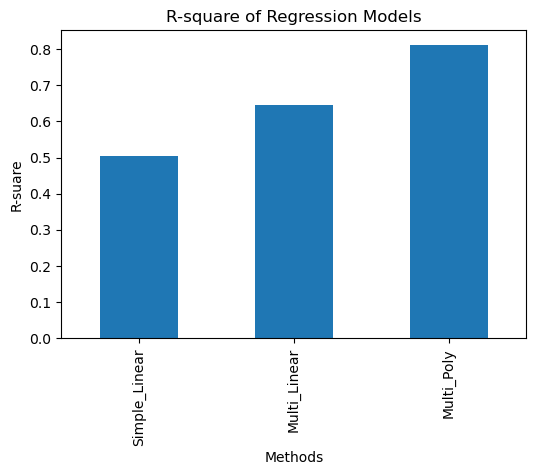

In [118]:
score_methods_acc = data["R-square"]
score_methods_acc.plot(kind='bar', figsize=(6, 4))
plt.xlabel('Methods') # add to x-label to the plot
plt.ylabel('R-suare') # add y-label to the plot
plt.title('R-square of Regression Models') # add title to the plot
plt.show()

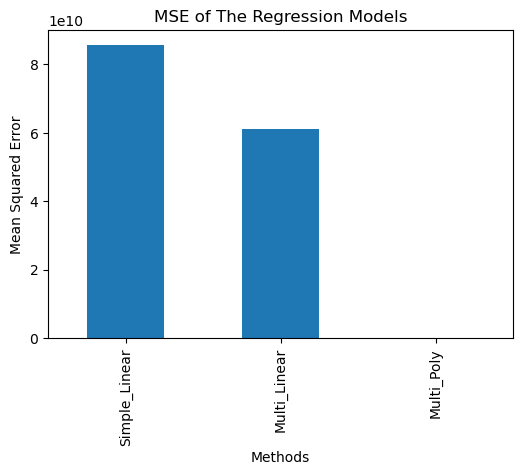

In [119]:
mse_methods_acc = data["MSE"]
mse_methods_acc.plot(kind='bar', figsize=(6, 4))
plt.xlabel('Methods') # add to x-label to the plot
plt.ylabel('Mean Squared Error') # add y-label to the plot
plt.title('MSE of The Regression Models') # add title to the plot
plt.show()